# Life history trade-offs: Antibiotic Resistance and Vaccination

for the entity of this simulation we will assume the same population size $N$ and the same starting conditions for $S_0$, $I_0$ and $R_0$. The rest of the parameters varies from case to case.

In [595]:
#imports

import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact, interactive, interact_manual, fixed
import ipywidgets as widgets
from ipywidgets import FloatSlider, IntSlider

The parameter values were taken from Lehtinen 2018 and Colijn 2009

## SISV model modelling antibiotic resistance in response to vaccine rollout

### Model 

In order to model vaccination as a real rollout and not just a mere drop in susceptibles, we will have to create a new model, including a compartement of susceptibles $S$ and vaccinated individuals $V$. THen we have two classes of infecteds, vaccine-type $v$ and non-vaccine-type $nv$ and for each of these classes two categories, namely antibiotic sensitive $s$ and antibiotic resistant $r$. In order to track who was vaccinated and who wasn't we subdivide the $nv$ compartments further into an $nv,S$ for non-vaccine-type and from the susceptibles and $nv,V$ for non-vaccine-type from the vaccinated compartement. For the vaccine-type we don't have to make this subdivision, because the vaccine-type can only infect susceptibles but not vaccinated individuals.

![](SISV.png)

The model gives rise to the following ODE system:

$$
\begin{aligned}
\frac{dS}{dt} &= (\gamma + \tau)(I_S^{nv,S}+I_S^v) - \beta S (I_S^{nv,S}+I_S^v) + c_{\gamma}\gamma(I_R^{nv,S}+I_R^v) - \frac{\beta}{c_{\beta}}S(I_R^{nv,S}+I_R^v) - \nu S\\
\frac{dI_S^{nv,S}}{dt} &= \beta S I_S^{nv,S} - (\gamma + \tau) I_S^{nv,S}\\
\frac{dI_R^{nv,S}}{dt} &= \frac{\beta}{c_{\beta}} S I_R^{nv,S} - c_{\gamma}\gamma I_R^{nv,S}\\
\frac{dI_S^{nv,V}}{dt} &= \beta V I_S^{nv,V} - (\gamma + \tau) I_S^{nv,V}\\
\frac{dI_R^{nv,V}}{dt} &= \frac{\beta}{c_{\beta}} V I_R^{nv,V} - c_{\gamma}\gamma I_R^{nv,V}\\
\frac{dI_S^v}{dt} &= \beta S I_S^v - (\gamma + \tau) I_S^v\\
\frac{dI_R^v}{dt} &= \frac{\beta}{c_{\beta}} S dI_R^v - c_{\gamma}\gamma dI_R^v\\
\frac{dV}{dt} &= \nu S + (\gamma + \tau)I_S^{nv,V} - \beta V I_S^{nv,V} + c_{\gamma}\gamma I_R^{nv,V} - \frac{\beta}{c_{\beta}} V I_R^{nv,V}
\end{aligned}
$$

In [1]:
#adding birth and death rates to the simple SIR model

#available population to infect

N = 1000

#prior infected susceptible and resistant
IsnvS0, IrnvS0, IsnvV0, IrnvV0, Isv0, Irv0, V0 = 1, 1, 0, 0, 1, 1, 0

#prior susceptible
S0 = N - IsnvS0 - IrnvS0 - IsnvV0 - IrnvV0 - Isv0 - Irv0 - V0

#parameters
beta = 2/N # why does frequency dependent beta make such a difference to density dependent?

#clearance rate
gamma = 1

#vaccination rate
nu = 0.1

#interval to plot
t = 120

#terms to be added because of resistance modelling
cg = 1.1
cb = 1.0
tau = 0.075

In [597]:
#PRE: all variables are positive integers
#POST: The SISV model on antibiotic resistance with vaccine rollout

def SISV (t, y, N, beta, gamma, cg, cb, tau, nu):
    S, IsnvS, IrnvS, IsnvV, IrnvV, Isv, Irv, V = y
    if(t<200):
        nu = 0
        dSdt = (gamma + tau) * (IsnvS + Isv) - beta * S * (IsnvS + Isv) + cg * gamma * (IrnvS + Irv) - beta/cb * S * (IrnvS + Irv) - nu * S
        dIsnvSdt = beta * S * IsnvS - (gamma + tau) * IsnvS
        dIrnvSdt = beta/cb * S * IrnvS - cg * gamma * IrnvS
        dIsnvVdt = beta * V * IsnvV
        dIrnvVdt = 
        dIsvdt =
        dIrvdt = 
        dVdt = 
    else:
        dSdt = (gamma + tau) * (IsnvS + Isv) - beta * S * (IsnvS + Isv) + cg * gamma * (IrnvS + Irv) - beta/cb * S * (IrnvS + Irv) - nu * S
        dIsnvSdt = beta * S * IsnvS - (gamma + tau) * IsnvS
        dIrnvSdt = beta/cb * S * IrnvS - cg * gamma * IrnvS
        dIsnvVdt = beta * V * IsnvV - (gamma + tau) * IsnvV
        dIrnvVdt = beta/cb * S * IrnvV - cg * gamma * IrnvV
        dIsvdt = beta * S * Isv - (gamma + tau) * Isv
        dIrvdt = beta/cb * s * Irv - cg * gamma * Irv
        dVdt = nu * S + (gamma + tau) * IsnvV - beta * V * IsnvV + cg * gamma * IrnvV - beta/cb * V * IrnvV

    return dSdt, dIsnvSdt, dIrnvSdt, dIsnvVdt,dIrnvVdt, dIsvdt, dIrvdt, dVdt

### Solving the ODE system

In [598]:
#numerically integrate the ODEs
y0 = S0, Is0, Ir0
sol = solve_ivp(SIS, [0,t], y0, rtol=1e-6, method = 'RK23', dense_output = True, args=(N, beta, gamma, cg, cb, tau), max_step = 10000)

### Plotting the results


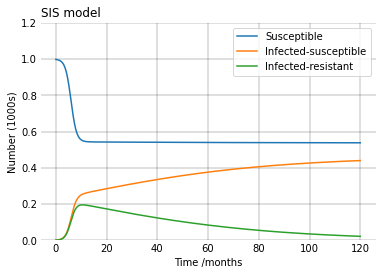

In [599]:
#plot
fig = plt.figure()
ax = fig.add_subplot(111,  axisbelow=True)
curves = ax.plot(sol.t, sol.y.T/1000)
ax.legend(curves, ['Susceptible', 'Infected-susceptible', 'Infected-resistant'])
ax.set_xlabel('Time /months')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='k', lw=0.25, ls='-')
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('SIS model', loc='left')
plt.show()

### Interactive plotting tool

In [600]:
#numerically integrate the ODEs
def interactive_plot(y0, t, N, beta, gamma, cg, cb, tau, V):
    #defining the susceptibles for the model - will reduce the number of available hosts by introducing more vaccinated hosts
    S0 = N - V - Is0 - Ir0
    y0 = S0, Is0, Ir0
    #solve the SIS numerically
    sol = solve_ivp(SIS, [0,t], y0, method = 'RK23', dense_output = True, args=(N, beta, gamma, cg, cb, tau))
    #plot the results
    fig = plt.figure()
    ax = fig.add_subplot(111,  axisbelow=True)
    curves = ax.plot(sol.t, sol.y.T/1000)
    ax.legend(curves, ['Susceptible', 'Infected-sensitive', 'Infected-resistant'])
    ax.set_xlabel('Time /months')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='k', lw=0.25, ls='-')
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.title('SIS model', loc='left')
    plt.show()

In [601]:
interact(interactive_plot, y0 = fixed(y0) , t = fixed(t), N = fixed(N), beta = widgets.FloatSlider(min=0.1/N, max=4/N, step=0.1/N, value=beta), gamma = widgets.FloatSlider(min=0.1, max=1, step=0.1, value=gamma), cg = (cg), cb = (cb) , tau = widgets.FloatSlider(min=0.05, max=1, step=0.05, value=tau), V = widgets.IntSlider(min=0, max=N, step=10, value=0))

interactive(children=(FloatSlider(value=0.002, description='beta', max=0.004, min=0.0001, step=0.0001), FloatS…

<function __main__.interactive_plot(y0, t, N, beta, gamma, cg, cb, tau, V)>

### Phase plot of the system

For the phase plot we simplify the system. Since we neglect births and deaths as seen above we get a constant population size N: $ N = S + I_R + I_S$. This means the system becomes a 2x2 system of equation:

$$
\begin{aligned}
\frac{dI_S}{dt} &= \beta(N-I_S-I_R) I_S - (\gamma + \tau) I_S\\
\frac{dI_R}{dt} &= \frac{\beta}{c_{\beta}}(N-I_S-I_R)I_R - c_{\gamma}\gamma I_R
\end{aligned}
$$

This simplified system can be solved in a phase plane analysis as seen below for varrying initial conditions of $I_S$ and $I_R$.

In [602]:
#PRE: all variables are positive integers
#POST: The simplified SIS model on antibiotic resistance

def SISsimplified (y,t,N,beta,gamma,cg,cb,tau):
    Is, Ir = y
    dIsdt = beta * (N-Is-Ir) * Is - (gamma + tau) * Is
    dIrdt = beta / cb * (N-Is-Ir) * Ir - cg * gamma * Ir

    return dIsdt, dIrdt

1.0
1.0
101.0
101.0


Text(0, 0.5, 'Infected-resistant')

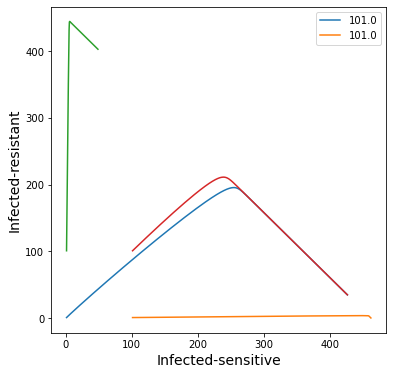

In [603]:
y0 = Is0, Ir0
ts = np.linspace(0, 100, 1000)

fig = plt.figure()
fig.set_size_inches(6,6)
ics = np.arange(1.0, 200, 100)# initial conditions

for r in ics:
    for s in ics:
        y0 = s, r
        print(y0[1])
            #sol2 = solve_ivp(SISsimplified, 0,t], y0, method = 'RK23', dense_output = True, args=(N, beta,     gamma, cg, cb, tau))
        sol2 = odeint (SISsimplified, y0, ts, args= (N, beta,  gamma, cg, cb, tau))
        plt.plot(sol2[:,0],sol2[:,1], "-")
        plt.legend(y0)
plt.xlabel("Infected-sensitive", fontsize=14)
plt.ylabel("Infected-resistant", fontsize=14)